In [82]:
import keras
import sys
import sys
sys.path.insert(0, '../models')

from  multiclass_MLP_v1_0 import create_mnist_train_test

In [83]:

X_train,  X_valid, X_test, y_train, y_valid, y_test = create_mnist_train_test()
model = keras.models.load_model("../multiclass_MLP_v1_alternate") # rollback to best model

print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 1ms/step - loss: 0.0804 - accuracy: 0.9853
[0.08041948825120926, 0.9853000044822693]


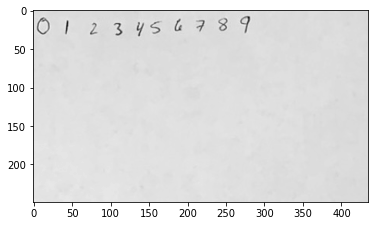

In [84]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt


image = cv2.imread('./IMG_8790.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

plt.imshow(grey, cmap='gray')

In [108]:
# ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
ret, thresh = cv2.threshold(grey.copy(), 255, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

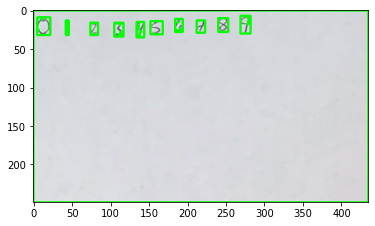

In [109]:

preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
# print("\n\n\n----------------Contoured Image--------------------")
# plt.imshow(image, cmap="gray")
# plt.show()

plt.imshow(image)
    
# inp = np.array(preprocessed_digits)

1/1 [==============================] - 0s 173ms/step
PREDICTED NUMBER:  3


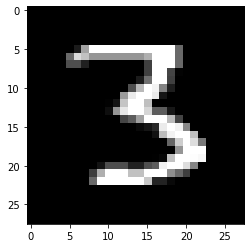

In [138]:
prediction = np.argmax(model.predict(preprocessed_digits[0].reshape(1, 28, 28, 1)) )
print("PREDICTED NUMBER: ", prediction) 
plt.imshow(preprocessed_digits[0].reshape(28, 28), cmap="gray")


## Analysis of Example Images

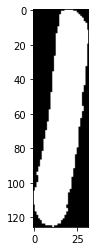

In [72]:
plt.imshow(digit, cmap='gray')

## Trying to resize mnist dataset to larger images

# Pipeline Testing

### Imports and Loading Model

In [ ]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import math
import keras
import sys
import sys
sys.path.insert(0, '../models')
from  multiclass_MLP_v1_0 import create_mnist_train_test

X_train,  X_valid, X_test, y_train, y_valid, y_test = create_mnist_train_test()
model = keras.models.load_model("../multiclass_MLP_v1_alternate") # rollback to best model
print(model.evaluate(X_test, y_test))

### Display Images and Predictions


----------------Contoured Image--------------------


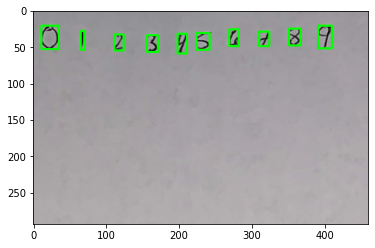

1/1 [==============================] - 0s 20ms/step


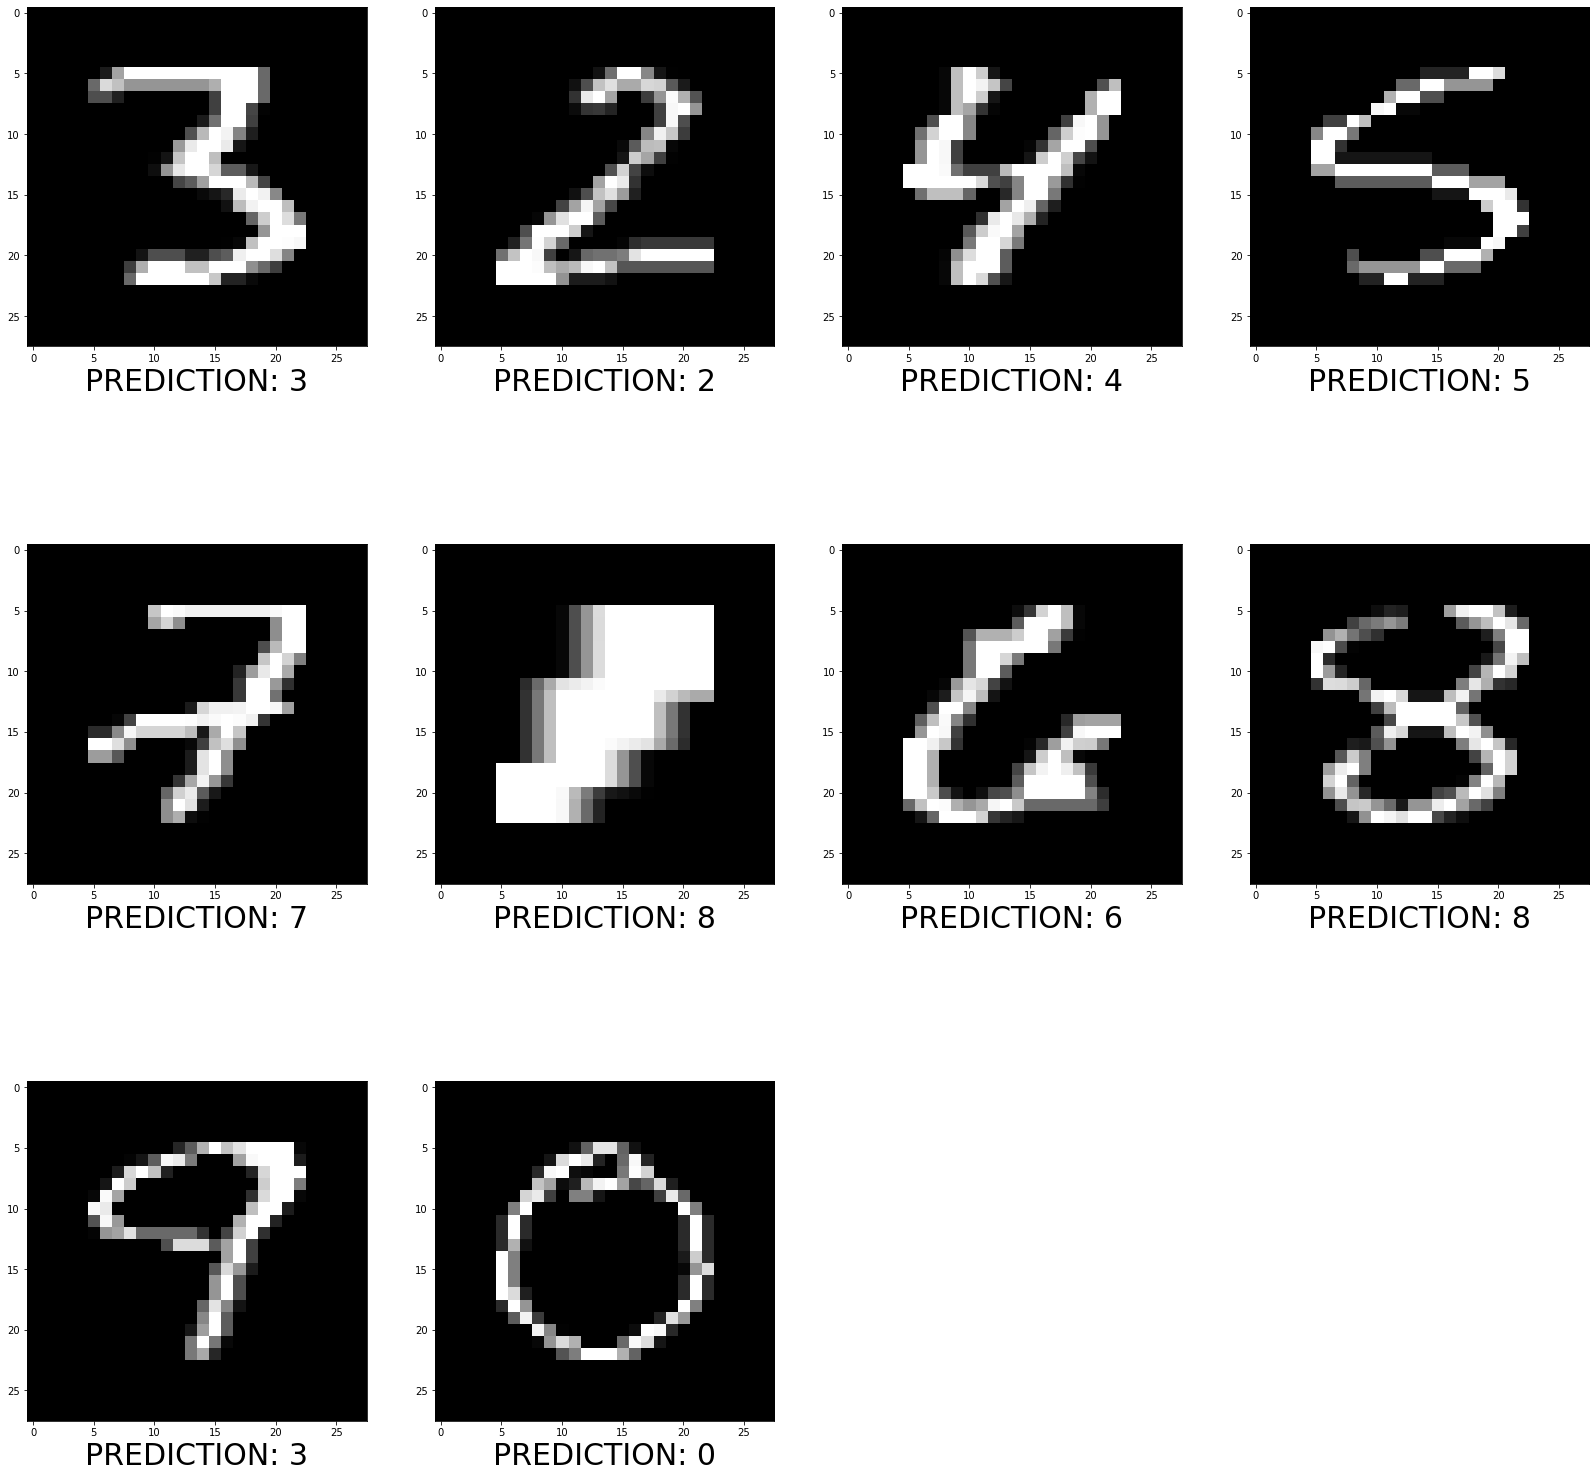

In [35]:
image = cv2.imread('./IMG_8789.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
bounded_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    # bounded_digits.append(digit)

print("\n----------------Contoured Image--------------------")

plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

bounded_digit_index = 0

columns = 4
rows = math.ceil( len(preprocessed_digits) / columns)
fig = plt.figure(figsize=(28, 28))

for i in range(1, rows*columns - 1):
    # Make prediction on each image before plotting
    prediction = model.predict(preprocessed_digits[i-1].reshape(1, 28, 28, 1))

    p = fig.add_subplot(rows, columns, i)
    plt.xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=30)    
    plt.imshow(preprocessed_digits[i - 1], cmap='gray')

    

### Identify Numbers From Input Image

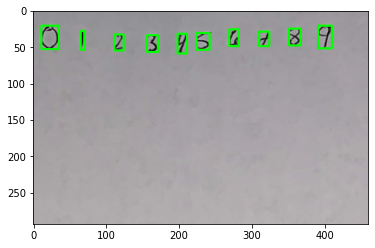

In [139]:
def image_bounded(image_path):
  image = cv2.imread(f'./{image_path}.jpg')
  grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
  contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

  plt.imshow(image, cmap="gray")
  plt.show()
    
image_bounded("IMG_8789")


### Resolving Distortion of Narrow Image Predictions

1/1 [==============================] - 0s 21ms/step


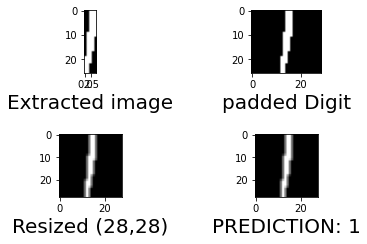

In [130]:
def display_narrow_image_preprocessing(image_path, image_index):
  image = cv2.imread(f'./{image_path}.jpg')
  grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
  contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # PRINT CROPPED IMAGE
  c = contours[image_index]
  x,y,w,h = cv2.boundingRect(c)
  # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
  cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
  # Cropping out the digit from the image corresponding to the current contours in the for loop
  digit = thresh[y:y+h, x:x+w]


  # PLOTTING GLOBAL VARIABLES
  f, axarr = plt.subplots(2,2)
  f.tight_layout(pad=4)
  # END PLOTTING GLOBALS

  axarr[0,0].imshow(digit, cmap="gray")
  axarr[0,0].set_xlabel("Extracted image", fontsize=20)    

  # HAND SCENARIO WHEN IMAGE IS NARROW; y pixel length is less than 10 pixels
  x, y = digit.shape
  padded_digit = digit.copy()

  if (y < 10):
    # Padd x-axis
    difference = round((28 - y)/2)
    padded_digit = np.pad(padded_digit, ((0,0),(difference,difference)), "constant", constant_values=0)

  # Add resize image to graph
  axarr[0,1].imshow(padded_digit, cmap="gray")
  axarr[0,1].set_xlabel("padded Digit", fontsize=20)    


  # Resizing that digit to (18, 18)
  resized_digit = cv2.resize(padded_digit, (28,28))
  axarr[1,0].imshow(resized_digit, cmap="gray")
  axarr[1,0].set_xlabel("Resized (28,28)", fontsize=20)   

  prediction = model.predict(resized_digit.reshape(1, 28, 28, 1))

  axarr[1,1].imshow(resized_digit, cmap="gray")
  axarr[1,1].set_xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=20)    

  plt.show()
  return


display_narrow_image_preprocessing('IMG_8789', 5)


----------------Contoured Image--------------------


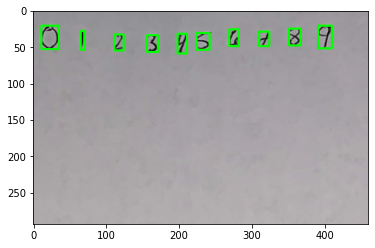

1/1 [==============================] - 0s 21ms/step


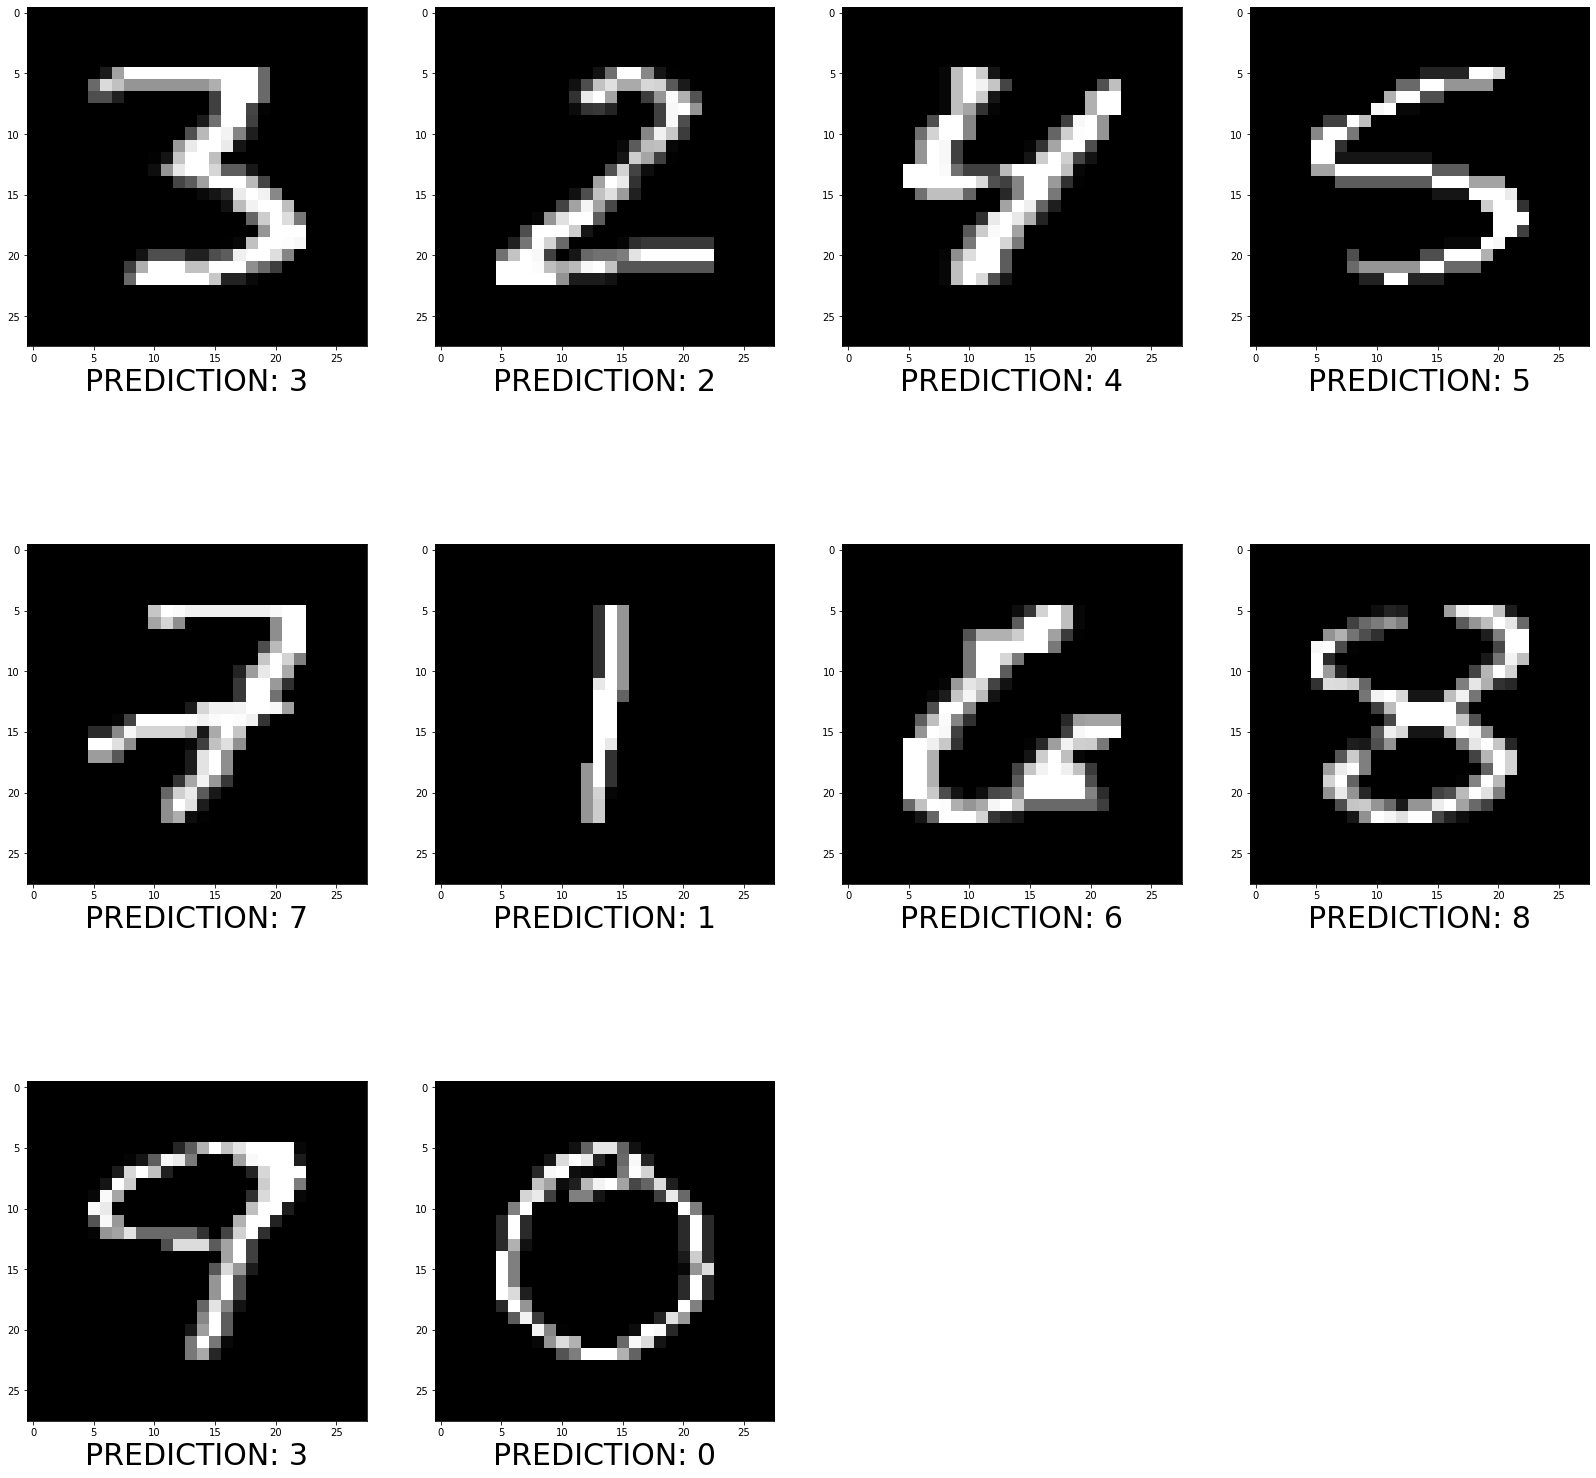

In [137]:
image = cv2.imread('./IMG_8789.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
bounded_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # @todo create a ratio to better square a general image
    # CHANGE NARROW OBJECTS TO SOON BE (18,18) PIXEL DIGIT
    # HAND SCENARIO WHEN IMAGE IS NARROW; y pixel length is less than 10 pixels
    x, y = digit.shape
    padded_digit = digit.copy()

    if (y < 10):
        # Padd x-axis
        difference = round((28 - y)/2)
        padded_digit = np.pad(padded_digit, ((0,0),(difference,difference)),"constant", constant_values=0)

    # Resize digit
    resized_digit = cv2.resize(padded_digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    # bounded_digits.append(digit)

print("\n----------------Contoured Image--------------------")

plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

bounded_digit_index = 0

columns = 4
rows = math.ceil( len(preprocessed_digits) / columns)
fig = plt.figure(figsize=(28, 28))

for i in range(1, rows*columns - 1):
    # Make prediction on each image before plotting
    prediction = model.predict(preprocessed_digits[i-1].reshape(1, 28, 28, 1))

    p = fig.add_subplot(rows, columns, i)
    plt.xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=30)    
    plt.imshow(preprocessed_digits[i - 1], cmap='gray')

    